In [1]:
## load packages
import pandas as pd
import FlowCytometryTools as fct
import numpy as np
import pandas as pd
import os
import sklearn.metrics as skmet
import itertools

from pylab import *
from plotnine import *
from plotnine.data import *
from itertools import combinations

# make ggplot classic looking
ggplot_classic = theme(panel_background = element_rect(fill='white'), panel_border=element_rect(color='black', size=1), panel_grid_major = element_blank(), panel_grid_minor = element_blank(), legend_box = element_rect(fill="white", size = 0.5)) 

In [7]:
## define function to remove quotes from column
rm_quote = lambda x: x.replace('"', '')

## load dataset
df_noNLS = pd.read_csv('02-05-18_A01_noNLS.LOG', names = ['image_compartment', 'date_time', 'time_elapsed', 'well_site', 'wavelength', 'obj_number', 'area', 'intensity'], converters={'image_compartment': rm_quote, 'date_time': rm_quote, 'time_elapsed': rm_quote, 'well_site': rm_quote, 'obj_number': rm_quote})
df_noNLS['condition'] = 'no NLS'
df_wtNLS = pd.read_csv('02-05-18_A02_WT-NLS.LOG', names = ['image_compartment', 'date_time', 'time_elapsed', 'well_site', 'wavelength', 'obj_number', 'area', 'intensity'], converters={'image_compartment': rm_quote, 'date_time': rm_quote, 'time_elapsed': rm_quote, 'well_site': rm_quote, 'obj_number': rm_quote})
df_wtNLS['condition'] = 'Wild-type SV40 NLS'
df_r2t2lib = pd.read_csv('02-05-18_Rep2-Tech1_library.LOG', names = ['image_compartment', 'date_time', 'time_elapsed', 'well_site', 'wavelength', 'obj_number', 'area', 'intensity'], converters={'image_compartment': rm_quote, 'date_time': rm_quote, 'time_elapsed': rm_quote, 'well_site': rm_quote, 'obj_number': rm_quote})
df_r2t2lib['condition'] = 'SV40 NLS library'

## remove duplicated rows
df = pd.concat([df_noNLS, df_wtNLS, df_r2t2lib], axis = 0)

df.iloc[  :, :]

,image_compartment,date_time,time_elapsed,well_site,wavelength,obj_number,area,intensity,condition
0,NIR_and_cytoplasm,07:46:24.907,00:00:00.000,A01 : Site 10,700,1,237.1340,13449.20,no NLS
1,NIR_and_nucleus,07:46:24.108,00:00:00.000,A01 : Site 10,520,1,303.2820,18336.10,no NLS
2,NIR_and_cytoplasm,07:46:24.907,00:00:00.000,A01 : Site 10,700,2,152.6810,12302.00,no NLS
3,NIR_and_nucleus,07:46:24.108,00:00:00.000,A01 : Site 10,520,2,142.2810,12317.00,no NLS
4,NIR_and_cytoplasm,07:46:24.907,00:00:00.000,A01 : Site 10,700,3,221.7410,13881.30,no NLS
5,NIR_and_nucleus,07:46:24.108,00:00:00.000,A01 : Site 10,520,3,215.5010,12436.90,no NLS
6,NIR_and_cytoplasm,07:46:24.907,00:00:00.000,A01 : Site 10,700,4,181.8030,9701.75,no NLS
7,NIR_and_nucleus,07:46:24.108,00:00:00.000,A01 : Site 10,520,4,196.3640,9426.63,no NLS
8,NIR_and_cytoplasm,07:46:24.907,00:00:00.000,A01 : Site 10,700,5,94.8537,11753.90,no NLS
9,NIR_and_nucleus,07:46:24.108,00:00:00.000,A01 : Site 10,520,5,85.7011,10134.70,no NLS


In [8]:
# melt the dataframe such that the id_vars are well_site and obj_number
df2 = pd.melt(df, id_vars = ['well_site', 'obj_number', 'image_compartment', 'condition'], value_vars = ['area', 'intensity'])

df2.iloc[:10,:]

,well_site,obj_number,image_compartment,condition,variable,value
0,A01 : Site 10,1,NIR_and_cytoplasm,no NLS,area,237.1340
1,A01 : Site 10,1,NIR_and_nucleus,no NLS,area,303.2820
2,A01 : Site 10,2,NIR_and_cytoplasm,no NLS,area,152.6810
3,A01 : Site 10,2,NIR_and_nucleus,no NLS,area,142.2810
4,A01 : Site 10,3,NIR_and_cytoplasm,no NLS,area,221.7410
5,A01 : Site 10,3,NIR_and_nucleus,no NLS,area,215.5010
6,A01 : Site 10,4,NIR_and_cytoplasm,no NLS,area,181.8030
7,A01 : Site 10,4,NIR_and_nucleus,no NLS,area,196.3640
8,A01 : Site 10,5,NIR_and_cytoplasm,no NLS,area,94.8537
9,A01 : Site 10,5,NIR_and_nucleus,no NLS,area,85.7011


In [21]:
# use a pivot table to reorganize data
df3 = df2.pivot_table(index = ['well_site', 'obj_number', 'condition'], columns = ['image_compartment', 'variable'], values = 'value')

# add nc_ratio to the new datatable
df3['', 'nc_ratio'] = np.log(df3['NIR_and_nucleus', 'intensity'] / df3['NIR_and_cytoplasm', 'intensity'])

# reset index and rename columns
df3 = df3.reset_index()
# rename some columns
df3.columns = ['well_site', 'obj_num', 'condition', 'NIR_cyt_area', 'NIR_cyt_int', 'NIR_nuc_area', 'NIR_nuc_int', 'nc_ratio']

df3.iloc[:10,:]

,well_site,obj_num,condition,NIR_cyt_area,NIR_cyt_int,NIR_nuc_area,NIR_nuc_int,nc_ratio
0,A01 : Site 1,1,SV40 NLS library,163.914,10499.8,239.2140,10684.80,0.017466
1,A01 : Site 1,1,no NLS,106.086,10094.2,47.8429,12281.20,0.196109
2,A01 : Site 1,10,SV40 NLS library,218.829,10517.9,123.5590,18844.50,0.583143
3,A01 : Site 1,10,no NLS,190.539,10262.7,188.0430,19642.30,0.649169
4,A01 : Site 1,100,no NLS,160.170,14801.1,176.3950,12960.30,-0.132811
5,A01 : Site 1,101,no NLS,217.997,10471.2,223.8210,9846.01,-0.061562
6,A01 : Site 1,102,no NLS,336.148,11289.2,423.5130,16811.20,0.398199
7,A01 : Site 1,103,no NLS,323.251,11871.4,300.3700,13728.60,0.145349
8,A01 : Site 1,104,no NLS,263.344,10432.7,202.1880,10084.00,-0.033995
9,A01 : Site 1,11,SV40 NLS library,322.003,12135.3,257.5190,16441.50,0.303690


C:\Users\admin\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: UserWarning: 'stat_bin()' using 'bins = 126'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


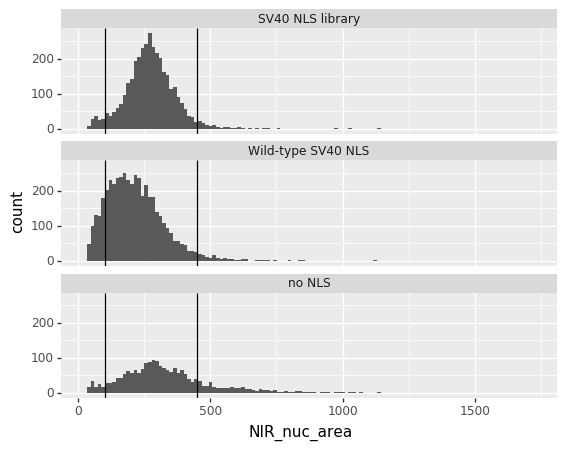

<ggplot: (-9223371892408812719)>

In [35]:
# filter out dim cells and plot nuclear areas
df4 = df3.loc[((df3.NIR_cyt_int > 11000) | (df3.NIR_nuc_int > 11000)),:]

ggplot(aes(x = 'NIR_nuc_area'), data = df4) + geom_histogram() + facet_wrap('~condition', ncol = 1) + geom_vline(xintercept = 100) + geom_vline(xintercept = 450)

In [36]:
df5 = df4.loc[(df4.NIR_nuc_area > 100) & (df4.NIR_nuc_area < 450),:]

In [40]:
# send to a csv for plotting in R
df5.to_csv('filtered_NLS_library_values.csv', index = False)

C:\Users\admin\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_density : Removed 146 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


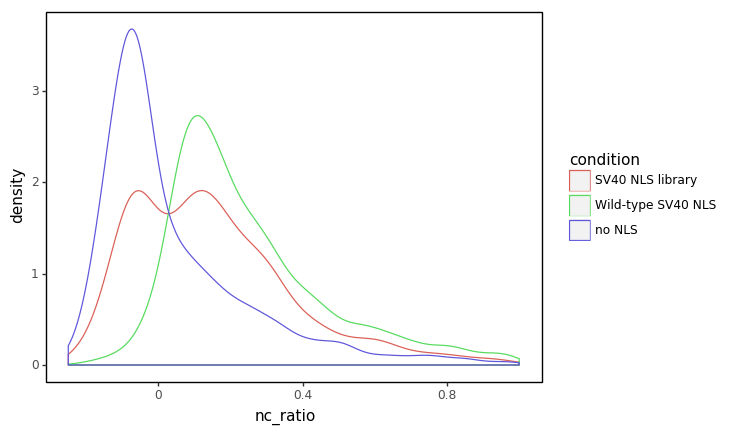

<ggplot: (144444458970)>

In [39]:
# plot some stuff!
ggplot(aes(x = 'nc_ratio', color = 'condition'), data = df5) + geom_density() + xlim(-0.25, 1) + ggplot_classic


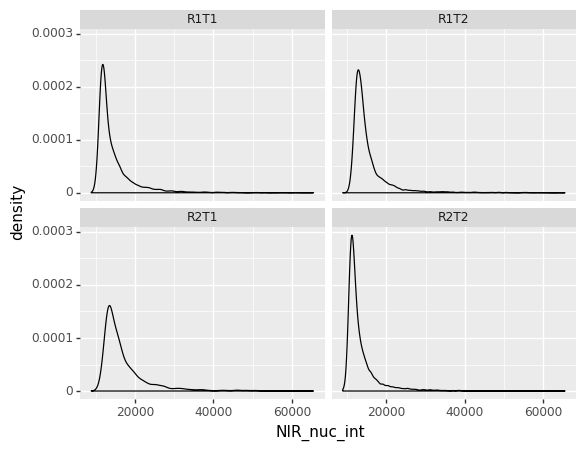

<ggplot: (135024400988)>

In [178]:
# consider filtering some cells? Use the same filter used on previous analyses
ggplot(aes(x = 'NIR_nuc_int'), data = df5) + geom_density() + facet_wrap('~replicate')

In [1]:
# filter value used in experiment was ~11,000
ggplot(aes(x = 'nc_ratio', fill = 'bin'), data = df5.loc[((df5.NIR_nuc_int > 20000) | (df5.NIR_cyt_int > 20000)) & ,:]) + geom_density(alpha = 0.3) + facet_wrap('~replicate') + xlim(-0.25, 0.5) + scale_fill_manual(values = ['#ffffb2','#fecc5c','#fd8d3c','#e31a1c']) + ggplot_classic

SyntaxError: invalid syntax (<ipython-input-1-15f8a9c4207c>, line 2)

C:\Users\admin\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_ydensity : Removed 1267 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


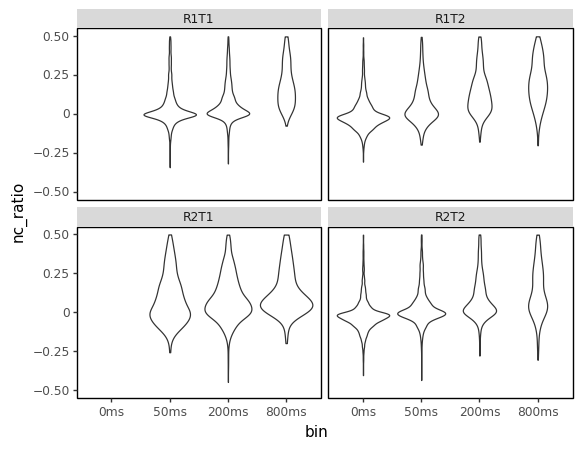

<ggplot: (-9223371901718376753)>

In [200]:
# filter value used in experiment was ~11,000
ggplot(aes(y = 'nc_ratio', x = 'bin'), data = df5.loc[(df5.NIR_nuc_int > 10000) | (df5.NIR_cyt_int > 10000),:]) + geom_violin() + facet_wrap('~replicate') + ggplot_classic + ylim(-0.5, 0.5)